<a href="https://colab.research.google.com/github/ShamEgo/YaleFaceColab/blob/master/CNNforYaleDatabase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd "/content/gdrive/My Drive/Colab Notebooks/Stuff that wokrs/CNN for Yale database/yalefaces"

/content/gdrive/My Drive/Colab Notebooks/Stuff that wokrs/CNN for Yale database/yalefaces


In [3]:
import keras
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from tensorflow.python.keras.layers import Convolution2D as Conv2D
from tensorflow.python.keras.layers import MaxPooling2D,Dense,Flatten
import cv2
from tensorflow.python.keras.optimizers import SGD
from sklearn.multiclass import OneVsRestClassifier
from PIL import Image
import glob
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from tensorflow.python.keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers.advanced_activations import LeakyReLU

In [4]:
mypath='/content/gdrive/My Drive/Colab Notebooks/Stuff that wokrs/CNN for Yale database/yalefaces'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]

#change extension of files
'''
files = os.listdir(path)
for file in files:
    os.rename(os.path.join(mypath, file), os.path.join(mypath,file+'.jpg'))
'''

#construct the label list
listmot=[]
for mot in onlyfiles:
    listmot.append(mot.split('.'))



y=[]
for mot in listmot:
    y.append(mot[0].split("t")[1])

lc= LabelEncoder()
y = lc.fit_transform(y)
image_list = []
image_toarray=[]
for filename in glob.glob('/content/gdrive/My Drive/Colab Notebooks/Stuff that wokrs/CNN for Yale database/yalefaces/*'): 
    im=Image.open(filename)
    image_list.append(im)
    image_toarray.append(np.array(im))
image_toarray= np.array(image_toarray)

In [18]:
#splitting dataset for training and testing
X_train,X_test,y_train,y_test=train_test_split(image_toarray,y,train_size=0.25)
X_train=X_train.reshape(-1,243,320,1)
X_test=X_test.reshape(-1,243,320,1)
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')
X_train= X_train / 255.
X_test= X_test / 255.

#NN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(243,320,1),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(Dense(15, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#train model
history=model.fit(X_train,y_train,epochs=20,batch_size=20)


Epoch 1/20
3/3 [==============================] - 3s 1s/step - loss: 139.4376 - accuracy: 0.1951
Epoch 2/20
3/3 [==============================] - 3s 993ms/step - loss: 292.0537 - accuracy: 0.1220
Epoch 3/20
3/3 [==============================] - 3s 1s/step - loss: 74.8771 - accuracy: 0.1220
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 37.5764 - accuracy: 0.0732
Epoch 5/20
3/3 [==============================] - 3s 1s/step - loss: 43.6546 - accuracy: 0.0732
Epoch 6/20
3/3 [==============================] - 3s 1s/step - loss: 15.8021 - accuracy: 0.1951
Epoch 7/20
3/3 [==============================] - 3s 1s/step - loss: 19.4365 - accuracy: 0.1220
Epoch 8/20
3/3 [==============================] - 3s 1s/step - loss: 27.9124 - accuracy: 0.1951
Epoch 9/20
3/3 [==============================] - 3s 1s/step - loss: 3.7714 - accuracy: 0.5122
Epoch 10/20
3/3 [==============================] - 3s 1s/step - loss: 1.2517 - accuracy: 0.8293
Epoch 11/20
3/3 [===================

In [12]:
#visualize NN model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 243, 320, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 122, 160, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 122, 160, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 61, 80, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 80, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 40, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 158720)           

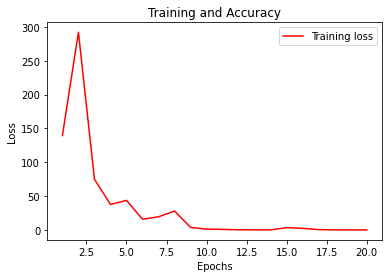

In [20]:
#plotting loss function
import matplotlib.pyplot as plt
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



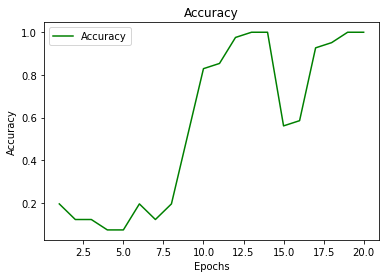

In [23]:
#plotting accuaracy
val_loss = history.history['accuracy'] 
plt.plot(epochs, val_loss, color='green', label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
#testing model
test_eval =model.evaluate(X_test, y_test)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])
predicted_classes =model.predict(X_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
correct = np.where(predicted_classes==y_test)[0]
print( "%d correct labels found from %d " % (len(correct),len(X_test)))

4/4 [==============================] - 3s 853ms/step - loss: 1.6815 - accuracy: 0.6504
Test loss: 1.6815060377120972
Test accuracy: 0.6504064798355103
78 correct labels found from 123 
